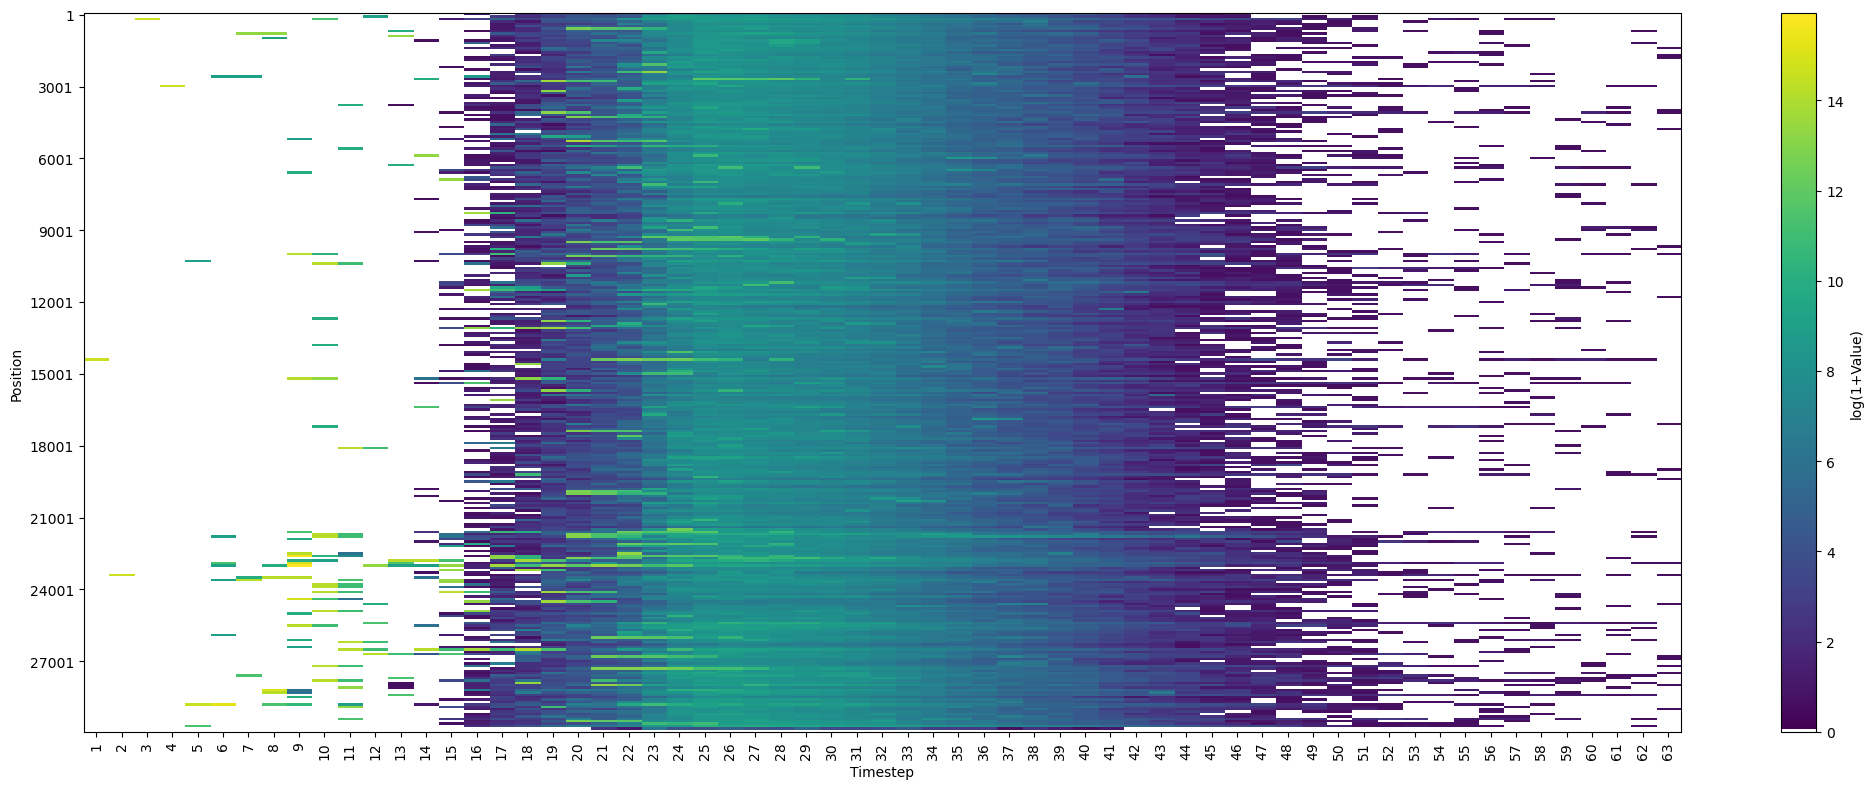

In [12]:
import pandas as pd
import os  
import glob
import re
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from matplotlib import cm


dir_path = "table_heatmap/250621/timestep_tables/pos-step100/"
output_csvfolder_path = "table_heatmap/250621/timestep_tables/"
output_heatmapfolder_path = "table_heatmap/250621/timestep_heatmaps/"

def natural_key(path):
    # ファイル名から数字部分を抽出してintで返す
    m = re.search(r'timestep_(\d+)\.csv', os.path.basename(path))
    return int(m.group(1)) if m else 0

csv_files = glob.glob(os.path.join(dir_path, "timestep_*.csv"))
csv_files = sorted(csv_files, key=natural_key)

def num2str_list(num):
    return [str(n+1) for n in range(num)]

for file,i in zip(csv_files, range(1,len(csv_files)+1)):
    df = pd.read_csv(file)
    if(i == 1):
        columns = ["position"]+num2str_list(len(csv_files))
        df_all = pd.DataFrame(np.zeros((int(len(df)), len(csv_files)+1), dtype=int), columns=columns)
        df_all["position"] = df["position"]
    df_all[str(i)] = df.iloc[:, 1:].sum(axis=1)

df_all.to_csv(os.path.join(output_csvfolder_path, "timestep_all.csv"), index=False)

# zero_white_cmapが未定義の場合はここで定義
if 'zero_white_cmap' not in globals():
    viridis = cm.get_cmap('viridis', 256)
    newcolors = viridis(np.linspace(0, 1, 256))
    white = np.array([1, 1, 1, 1]).reshape(1, 4)
    newcolors = np.vstack((white, newcolors))
    zero_white_cmap = mcolors.ListedColormap(newcolors)

# 0を含む場合はlog1p（log(1+x)）を使う
log_scaled_data = np.log1p(df_all.iloc[:, 1:])
# x軸はタイムステップ（列名1,2,3...）
x_labels = df_all.columns[1:]
# y軸はposition列
y_labels = df_all["position"].astype(str).tolist()

plt.figure(figsize=(max(10, log_scaled_data.shape[1]//3), 8))
im = plt.imshow(log_scaled_data, aspect='auto', cmap=zero_white_cmap, interpolation='nearest')
plt.colorbar(im, label='log(1+Value)')
plt.xlabel('Timestep')
plt.ylabel('Position')
plt.xticks(ticks=np.arange(log_scaled_data.shape[1]), labels=x_labels, rotation=90, ha='center')
# y軸は間引き（最大10分割）
if len(y_labels) > 10:
    step_y = max(1, len(y_labels)//10)
    yticks = np.arange(0, len(y_labels), step_y)
    yticklabels = [y_labels[i] for i in yticks]
    plt.yticks(ticks=yticks, labels=yticklabels)
else:
    plt.yticks(ticks=np.arange(len(y_labels)), labels=y_labels)
plt.tight_layout()
plt.savefig(f'{output_heatmapfolder_path}/timestep_all.png')
plt.show()
plt.close()

,position,A->T,A->G,A->C,T->A,T->G,T->C,G->A,G->T,G->C,C->A,C->T,C->G
0,1,344,1172,24,440,341,2607,919,1556,17,143,6491,22
1,101,623,2879,156,662,624,3796,6217,17817,451,377,18251,261
2,201,1253,4884,185,1735,3214,11366,5127,99267,315,483,2281945,591
3,301,253,1688,173,618,304,3166,6472,3683,210,765,20807,114
4,401,158,3020,330,938,346,2248,4170,1648,784,1645,5661,97


(300, 13)

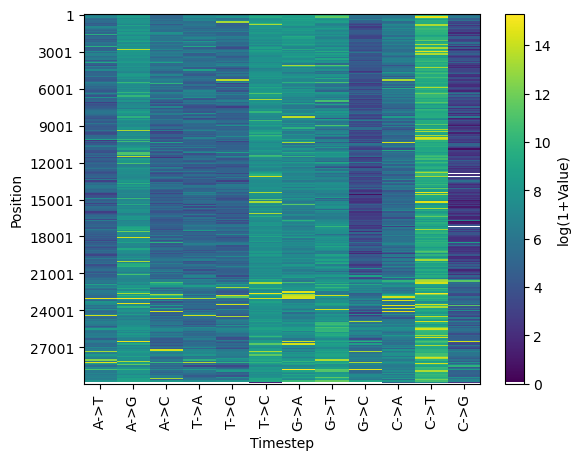

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("table_heatmap/250621/tables.csv")
# 1列目はposition等のインデックス列なら除外
values = df.iloc[:, 1:].values if df.shape[1] > 1 else df.values
n = 100
# reshapeして100行ごとに合計
summed = values[:(values.shape[0]//n)*n].reshape(-1, n, values.shape[1]).sum(axis=1)
# position列も100行ごとに代表値（最初の値）を使う
positions = df.iloc[:(values.shape[0]//n)*n, 0].values.reshape(-1, n)[:, 0]
# 新しいデータフレーム作成
summed_df = pd.DataFrame(summed, columns=df.columns[1:])
summed_df.insert(0, df.columns[0], positions)

# 結果を確認
display(summed_df.head())
display(summed_df.shape)

heatmap_data = summed_df.iloc[:, 1:]
log_scaled_data = np.log1p(heatmap_data)
x_labels = summed_df.columns[1:]
y_labels = df_all["position"].astype(str).tolist()

im = plt.imshow(log_scaled_data, aspect='auto', cmap=zero_white_cmap, interpolation='nearest')
plt.colorbar(im, label='log(1+Value)')
plt.xlabel('Timestep')
plt.ylabel('Position')
plt.xticks(ticks=np.arange(log_scaled_data.shape[1]), labels=x_labels, rotation=90, ha='center')
# y軸は間引き（最大10分割）
if len(y_labels) > 10:
    step_y = max(1, len(y_labels)//10)
    yticks = np.arange(0, len(y_labels), step_y)
    yticklabels = [y_labels[i] for i in yticks]
    plt.yticks(ticks=yticks, labels=yticklabels)
else:
    plt.yticks(ticks=np.arange(len(y_labels)), labels=y_labels)
plt.show()
plt.close()